# <h1>COMP2445 - Data Mining Assignment 2: 22005736<h1>

<strong>This dataset addresses the lack of public botnet datasets, especially for the IoT. It suggests *real* traffic data, gathered from 9 commercial IoT devices authentically infected by Mirai and BASHLITE.<strong>

<p>I found this data on the <a href='https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search='>UCI Machine Learning Repository.</a>

Number of variables –> attributes = 115
Number of rows -> instances - 7,062,606.
This is a categorical dataset, using clustering.
There are no missing values per variable.

In [1]:
import numpy as np
import pandas as pd

# Import Matplotlib
import matplotlib as mpl
# Import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
import statistics
from scipy import stats
import scipy.cluster.hierarchy as shc

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
#Performance Metrics
from sklearn.metrics import silhouette_score

In [3]:
#Reads data file
df = pd.read_csv("Detection of IOT Botnet Attacks/Danmini_Doorbell/benign_traffic.csv")
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49543,1.000000,102.000000,0.000000e+00,1.000000,102.000000,1.820000e-12,1.000009,101.999633,0.015405,2.270210,...,3.640000e-12,-1.570000e-30,0.0,4.218824,102.000000,0.000000,144.249783,1.820000e-12,5.970000e-23,0.000000e+00
49544,1.999976,102.000000,0.000000e+00,1.999986,102.000000,1.820000e-12,2.000004,101.999816,0.007702,3.270209,...,3.640000e-12,-1.580000e-44,0.0,4.218838,102.000000,0.000000,144.249783,3.640000e-12,-1.100000e-29,0.000000e+00
49545,2.999872,102.000000,3.640000e-12,2.999923,102.000000,1.820000e-12,2.999983,101.999878,0.005135,4.270206,...,0.000000e+00,-8.330000e-45,0.0,4.179949,102.000000,0.000002,144.249783,5.140000e-12,8.230000e-29,2.260000e-17
49546,3.999664,102.000000,3.640000e-12,3.999798,102.000000,0.000000e+00,3.999942,101.999908,0.003851,5.270200,...,3.640000e-12,4.980000e-69,0.0,4.219537,102.000000,0.000001,144.249783,1.820000e-12,5.960000e-29,0.000000e+00


# Attribute Information:
	-- The following describes each of the features headers:
		-- Stream aggregation:
			H: ("Source IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP)
			MI: ("Source MAC-IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP + MAC)
			HH: ("Channel" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host (IP) to the packet's destination host.
			HH_jit: ("Channel jitter" in N-BaIoT paper) Stats summarizing the jitter of the traffic going from this packet's host (IP) to the packet's destination host.
			HpHp: ("Socket" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host+port (IP) to the packet's destination host+port. Example 192.168.4.2:1242 -> 192.168.4.12:80
		-- Time-frame (The decay factor Lambda used in the damped window): 
			-- How much recent history of the stream is capture in these statistics
			-- L5, L3, L1, L0.1 and L0.01
		-- The statistics extracted from the packet stream:
			weight: The weight of the stream (can be viewed as the number of items observed in recent history)
			mean: ...
			std: ...
			radius: The root squared sum of the two streams' variances
			magnitude: The root squared sum of the two streams' means 
			cov: An approximated covariance between two streams
			pcc: An approximated correlation coefficient between two streams

In [4]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,49548.000000,49548.000000,...,4.954800e+04,4.954800e+04,49548.000000,49548.000000,49548.000000,4.954800e+04,49548.000000,4.954800e+04,4.954800e+04,4.954800e+04
mean,2.256231,92.387127,1.989736e+01,2.288308,92.382667,2.549500e+01,2.422229,92.829655,67.670150,4.291791,...,8.968526e+00,1.806003e+00,0.000371,4.861666,92.338129,1.392164e-01,130.175018,9.643987e+00,2.138594e+00,1.775780e-03
std,1.453213,17.640932,3.591753e+02,1.469317,17.455677,3.770187e+02,1.505076,15.858976,436.114015,1.644405,...,2.919997e+02,7.661357e+01,0.013878,1.244585,17.928385,1.812241e+00,25.106333,2.914718e+02,8.120645e+01,2.521668e-02
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-7.291934e+02,-0.142042,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.899823e+02,-1.353522e-01
25%,1.000000,97.999999,0.000000e+00,1.000029,97.976892,1.820000e-12,1.031097,93.553006,0.000808,2.878704,...,4.550000e-13,-1.780000e-35,0.000000,4.219096,98.000000,6.740000e-07,138.592929,1.820000e-12,-4.650000e-29,-7.242500e-18
50%,1.951958,101.999737,5.410000e-08,1.984559,101.985794,3.430290e-04,1.999986,101.337645,1.160150,4.241541,...,1.820000e-12,1.515000e-85,0.000000,4.220188,102.000000,1.350000e-06,144.249783,3.640000e-12,1.530000e-30,0.000000e+00
75%,3.121032,102.000000,2.594240e-04,3.398511,102.000000,1.687128e-01,3.969432,101.999583,42.268658,5.602002,...,3.640000e-12,3.950000e-34,0.000000,5.308375,102.000000,1.910000e-06,144.249783,5.140000e-12,7.530000e-29,2.000000e-17
max,8.837730,360.458980,2.123254e+04,10.876876,360.275733,2.138792e+04,14.488665,360.091968,20362.325690,20.148226,...,1.088123e+04,4.381892e+03,0.767997,11.283089,354.000000,5.890428e+01,688.052324,1.088186e+04,4.393551e+03,7.754023e-01


In [5]:
df = df[["MI_dir_L5_weight","MI_dir_L5_mean","MI_dir_L3_weight","MI_dir_L3_mean","MI_dir_L1_weight","MI_dir_L1_mean","MI_dir_L1_variance","MI_dir_L0.1_weight","H_L5_mean", "H_L3_mean", "H_L1_mean","HpHp_L0.1_pcc","HpHp_L0.01_weight","HpHp_L0.01_mean","HpHp_L0.01_magnitude"]]

Some variables are very small (data with exponential signs - e), this data will be dropped since they are too small to have an impact.

In [6]:
df.mode()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,1.0,102.0,1.0,102.0,1.0,102.0,0.00004,1.0,102.0,102.0,102.0,0.0,1.0,102.0,144.249783


In [7]:
df.dtypes

MI_dir_L5_weight        float64
MI_dir_L5_mean          float64
MI_dir_L3_weight        float64
MI_dir_L3_mean          float64
MI_dir_L1_weight        float64
MI_dir_L1_mean          float64
MI_dir_L1_variance      float64
MI_dir_L0.1_weight      float64
H_L5_mean               float64
H_L3_mean               float64
H_L1_mean               float64
HpHp_L0.1_pcc           float64
HpHp_L0.01_weight       float64
HpHp_L0.01_mean         float64
HpHp_L0.01_magnitude    float64
dtype: object

In [8]:
df.nunique()

MI_dir_L5_weight        22952
MI_dir_L5_mean          10139
MI_dir_L3_weight        29399
MI_dir_L3_mean          19543
MI_dir_L1_weight        37294
MI_dir_L1_mean          30136
MI_dir_L1_variance      35718
MI_dir_L0.1_weight      40386
H_L5_mean               10140
H_L3_mean               19544
H_L1_mean               30137
HpHp_L0.1_pcc            6200
HpHp_L0.01_weight       39911
HpHp_L0.01_mean           415
HpHp_L0.01_magnitude      444
dtype: int64

In [9]:
df.isnull().sum() #Checks for null values

MI_dir_L5_weight        0
MI_dir_L5_mean          0
MI_dir_L3_weight        0
MI_dir_L3_mean          0
MI_dir_L1_weight        0
MI_dir_L1_mean          0
MI_dir_L1_variance      0
MI_dir_L0.1_weight      0
H_L5_mean               0
H_L3_mean               0
H_L1_mean               0
HpHp_L0.1_pcc           0
HpHp_L0.01_weight       0
HpHp_L0.01_mean         0
HpHp_L0.01_magnitude    0
dtype: int64

<h3>Outlier Identification<h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb320ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb31fe490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb5e878d0>,
 'medians': [<matplotlib.lines.Line2D at 0x20cb31fe990>,
 'fliers': [<matplotlib.lines.Line2D at 0x20cb31fce10>,
 'means': []}

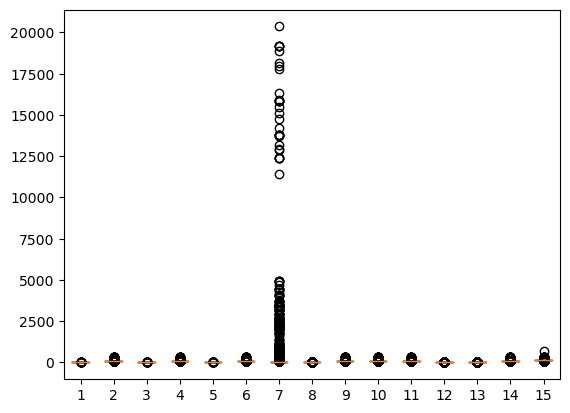

In [10]:
plt.boxplot(df)

In [11]:
z = np.abs(stats.zscore(df))
print(z)

       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L3_weight  MI_dir_L3_mean  \
0              0.864460        1.835927          0.876816        1.855155   
1              0.864460       14.830028          0.876816       14.987672   
2              0.274122       15.196168          0.256027       15.347200   
3              0.864460       13.866351          0.876816       14.013767   
4              0.396373        4.520997          0.336709        5.166143   
...                 ...             ...               ...             ...   
49543          0.864460        0.544924          0.876816        0.550963   
49544          0.176339        0.544924          0.196231        0.550963   
49545          0.511727        0.544924          0.484322        0.550963   
49546          1.199721        0.544924          1.164832        0.550963   
49547          1.886504        0.544924          1.844622        0.550963   

       MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0           

In [12]:
threshold = 1
print(np.where(z > threshold))

(array([    0,     0,     0, ..., 49547, 49547, 49547], dtype=int64), array([1, 3, 5, ..., 2, 4, 7], dtype=int64))


In [13]:
df_clean = df[(z < threshold).all(axis=1)]

In [14]:
print(df.shape)
print(df_clean.shape)

(49548, 15)
(17466, 15)


In [15]:
df_clean.corr() #Comparing correlations to variables

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
MI_dir_L5_weight,1.000000,0.550524,0.997747,0.517906,0.966539,0.478189,-0.193321,0.255381,0.550524,0.517906,0.478189,-0.003977,-0.675242,0.686579,0.686631
MI_dir_L5_mean,0.550524,1.000000,0.540171,0.965167,0.511077,0.700288,-0.329615,-0.166739,1.000000,0.965167,0.700288,0.009298,-0.755150,0.769203,0.769314
MI_dir_L3_weight,0.997747,0.540171,1.000000,0.499188,0.978487,0.454570,-0.167877,0.267746,0.540171,0.499188,0.454570,-0.003728,-0.680864,0.692295,0.692349
MI_dir_L3_mean,0.517906,0.965167,0.499188,1.000000,0.445594,0.827788,-0.511791,-0.186414,0.965167,1.000000,0.827788,0.003000,-0.657608,0.670024,0.670119
MI_dir_L1_weight,0.966539,0.511077,0.978487,0.445594,1.000000,0.361689,-0.063620,0.363982,0.511077,0.445594,0.361689,-0.000636,-0.675507,0.686749,0.686809
MI_dir_L1_mean,0.478189,0.700288,0.454570,0.827788,0.361689,1.000000,-0.870284,-0.234150,0.700288,0.827788,1.000000,-0.013193,-0.419726,0.426476,0.426533
MI_dir_L1_variance,-0.193321,-0.329615,-0.167877,-0.511791,-0.063620,-0.870284,1.000000,0.223555,-0.329615,-0.511791,-0.870284,0.017872,-0.022066,0.023615,0.023606
MI_dir_L0.1_weight,0.255381,-0.166739,0.267746,-0.186414,0.363982,-0.234150,0.223555,1.000000,-0.166739,-0.186414,-0.234150,-0.005942,0.175812,-0.179185,-0.179216
H_L5_mean,0.550524,1.000000,0.540171,0.965167,0.511077,0.700288,-0.329615,-0.166739,1.000000,0.965167,0.700288,0.009298,-0.755150,0.769203,0.769314
H_L3_mean,0.517906,0.965167,0.499188,1.000000,0.445594,0.827788,-0.511791,-0.186414,0.965167,1.000000,0.827788,0.003000,-0.657608,0.670024,0.670119


<Axes: >

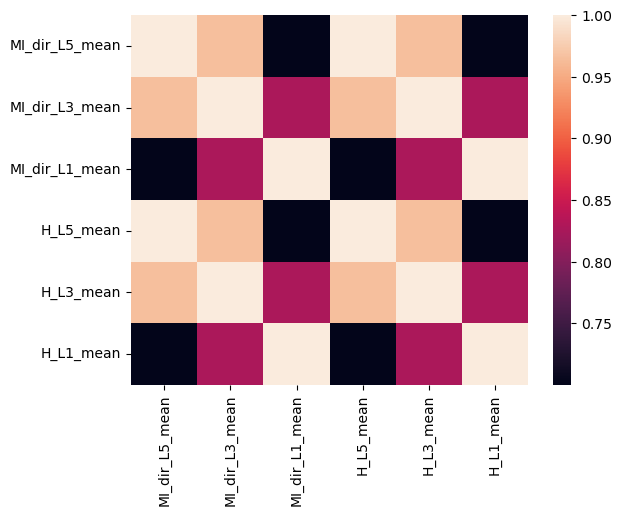

In [16]:
#Comparing means
mean = df_clean[['MI_dir_L5_mean','MI_dir_L3_mean','MI_dir_L1_mean','H_L5_mean','H_L3_mean','H_L1_mean']]
sns.heatmap(mean.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb4245e50>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb4247690>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb42452d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb4250c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb41ca490>],
 'means': []}

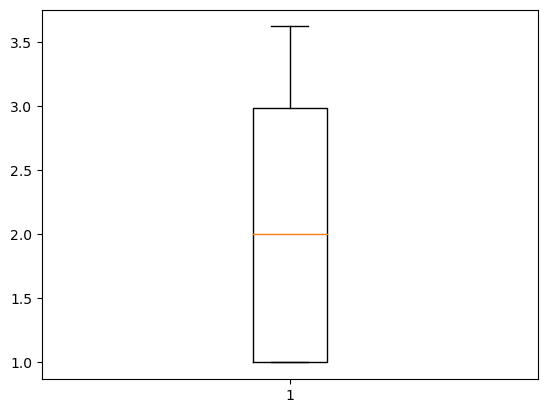

In [17]:
plt.boxplot(df_clean["MI_dir_L5_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb42bdbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb42bf390>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb42bced0>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb42c4a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb42c5490>],
 'means': []}

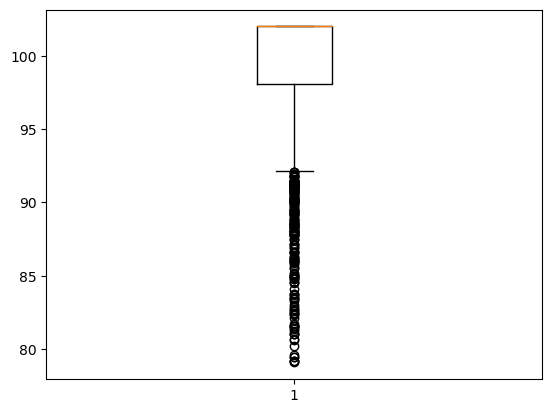

In [18]:
plt.boxplot(df_clean["MI_dir_L3_mean"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb4313f50>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb431d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb4313250>,
 'medians': [<matplotlib.lines.Line2D at 0x20cb431ed50>,
 'fliers': [<matplotlib.lines.Line2D at 0x20cb431d250>,
 'means': []}

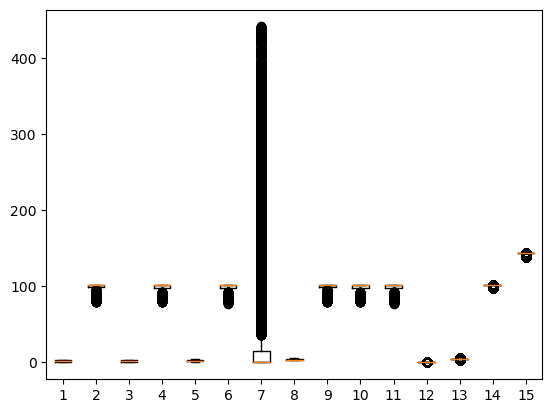

In [19]:
plt.boxplot(df_clean)

Text(0.5, 1.0, 'Source MAC-IP Address')

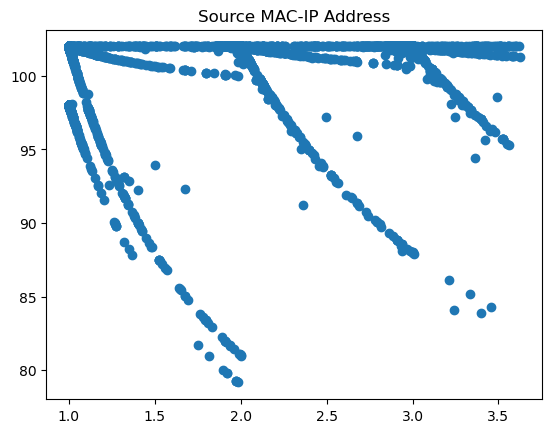

In [20]:
#Scatter plot creation
S = df_clean[['MI_dir_L5_weight','MI_dir_L5_mean']]
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])
plt.title("Source MAC-IP Address")

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb47db990>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb47e91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb47daf10>,
 'medians': [<matplotlib.lines.Line2D at 0x20cb47ea810>,
 'fliers': [<matplotlib.lines.Line2D at 0x20cb47eb290>,
 'means': []}

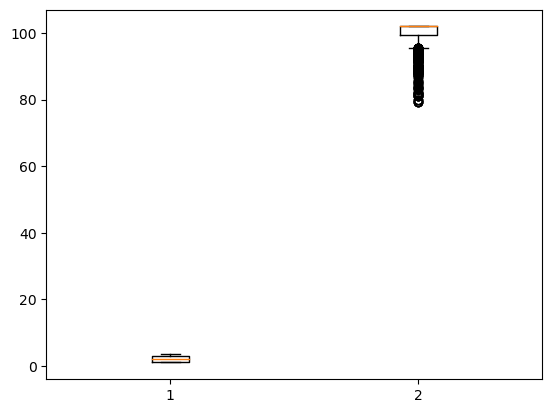

In [21]:
plt.boxplot(S)

<Axes: >

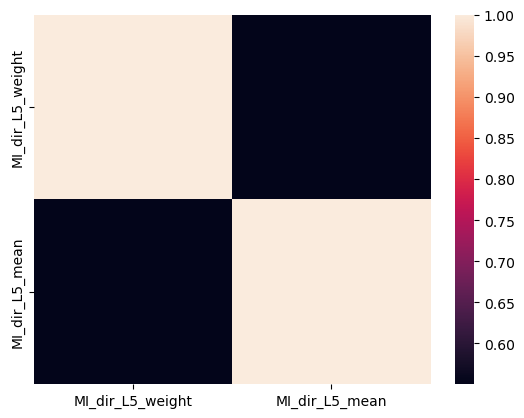

In [22]:
sns.heatmap(S.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb48e3e50>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb48f5690>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb48e3390>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb48f6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb48f76d0>],
 'means': []}

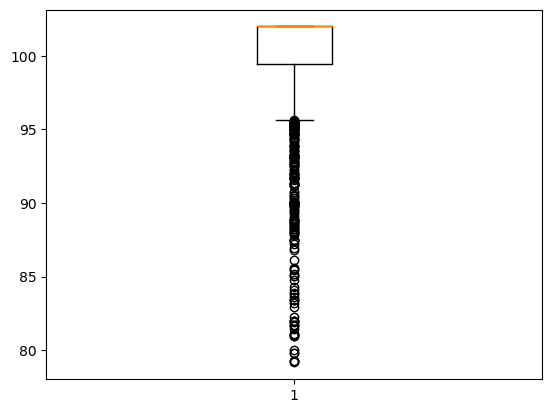

In [23]:
plt.boxplot(S['MI_dir_L5_mean'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20cb461a7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20cb461bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cb4619c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20cb46254d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cb45ddf50>],
 'means': []}

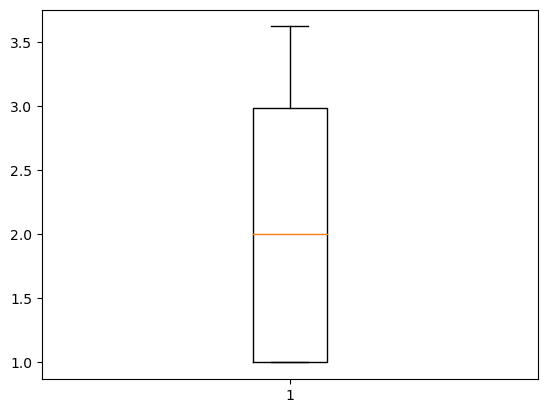

In [24]:
plt.boxplot(S['MI_dir_L5_weight'])

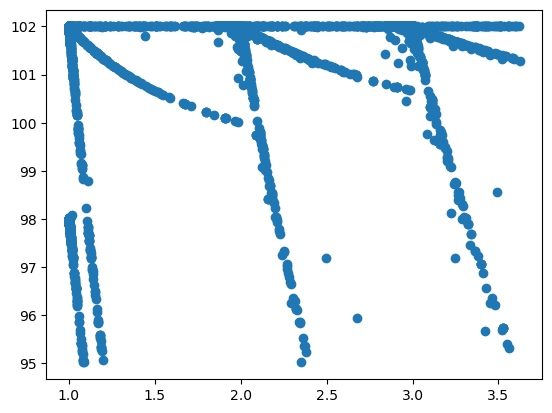

In [25]:
S = S.loc[(S.MI_dir_L5_mean > 95)] #Removing the outliers
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])

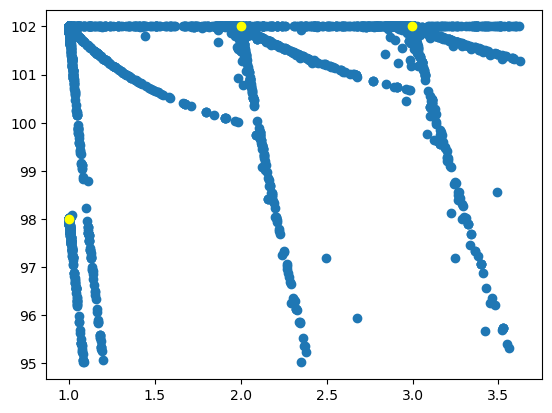

In [26]:
K=3
Centroids = (S.sample(n=K))
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])
plt.scatter(Centroids['MI_dir_L5_weight'],Centroids['MI_dir_L5_mean'],c='yellow')
plt.show()

In [27]:
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=S
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['MI_dir_L5_weight']-row_d['MI_dir_L5_weight'])**2
            d2=(row_c['MI_dir_L5_mean']-row_d['MI_dir_L5_mean'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        S[i]=ED
        i=i+1
    C=[]
    for index,row in S.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    S["Cluster"]=C
    Centroids_new = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['MI_dir_L5_mean'] - Centroids['MI_dir_L5_mean']).sum() + (Centroids_new['MI_dir_L5_weight'] - 
                                                                              Centroids['MI_dir_L5_weight']).sum()
        print(diff.sum())
    Centroids = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]

-0.006620951882001291
0.0


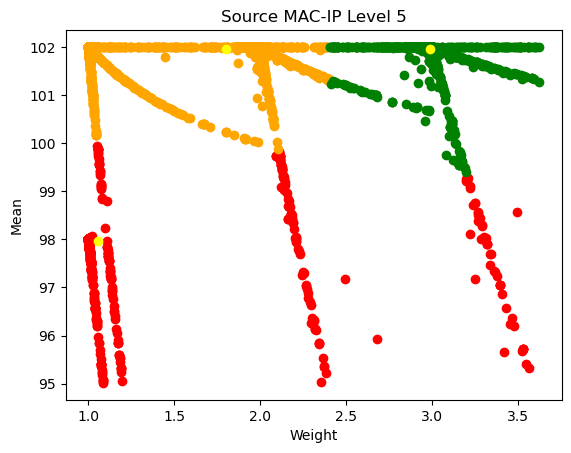

In [28]:
color=['red','orange','green']
for k in range(K):
    data=S[S["Cluster"]==k+1]
    plt.scatter(data['MI_dir_L5_weight'],data['MI_dir_L5_mean'],c=color[k])
plt.scatter(Centroids['MI_dir_L5_weight'],Centroids['MI_dir_L5_mean'],c='yellow')
plt.title("Source MAC-IP Level 5")
plt.xlabel("Weight")
plt.ylabel("Mean")
plt.show()

In [29]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)
df_scaled.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,0.003397,0.332921,0.003399,0.332928,0.003827,0.334448,0.005422,0.013886,0.332921,0.332928,0.334448,0.000000e+00,0.012870,0.332921,0.470821
1,0.006597,0.336466,0.006597,0.336466,0.006704,0.336257,0.000823,0.010441,0.336466,0.336466,0.336257,4.024402e-09,0.012028,0.326657,0.462528
2,0.006295,0.335599,0.006406,0.335599,0.006528,0.335451,0.006226,0.011500,0.335599,0.335599,0.335451,2.688086e-10,0.012443,0.328403,0.464909
3,0.003401,0.333276,0.003401,0.333276,0.003403,0.333216,0.002341,0.012169,0.333276,0.333276,0.333216,0.000000e+00,0.015293,0.333276,0.471324
4,0.006568,0.334977,0.006568,0.334977,0.006568,0.334977,0.000013,0.009942,0.334977,0.334977,0.334977,1.796396e-11,0.012761,0.329642,0.466571


In [30]:
#K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).describe()
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_scaled)

C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [31]:
kmeans.inertia_

232646.7035547976

C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'Inertia')

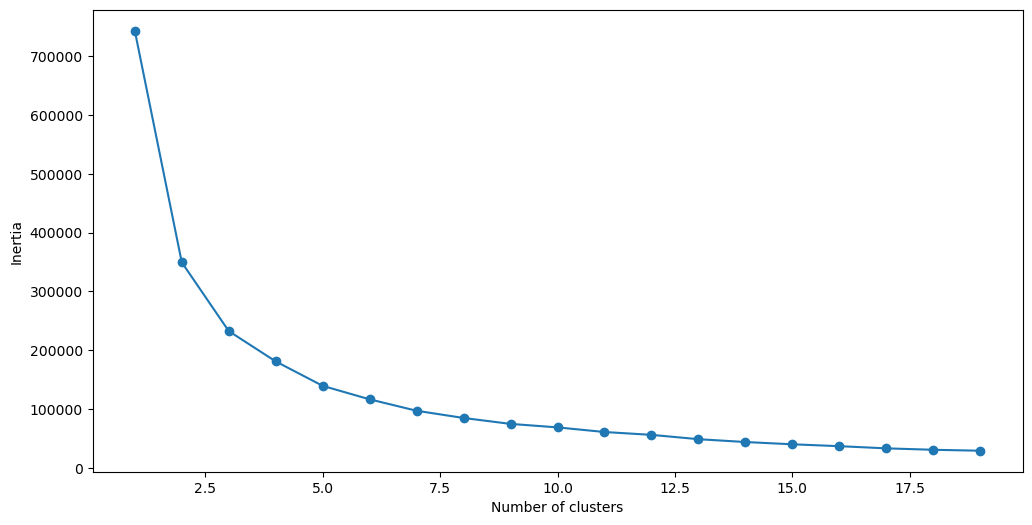

In [32]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=20) #Random state - Exact same split every time the code is run
# Fit the KMeans model
km.fit(df_scaled)
pred = km.predict(df_scaled)
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

C:\Users\lukem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    20233
2    18667
1    10648
Name: count, dtype: int64

In [34]:
# Calculate Silhoutte Score for K-Means
score = silhouette_score(df_scaled, km.labels_, metric='euclidean')
# Print the score
print("K-Means Clustering - Silhouette Score:",score)

K-Means Clustering - Silhouette Score: 0.5807487008528801
